# ML Model Trials

## Read Data and Import Packages

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [6]:
df = pd.read_csv('/Users/erica/Desktop/Y3S2/DSE3101/Local/reslae_price_normalized_for_ML.csv')

In [12]:
df['flat_model'].value_counts()

flat_model
Model A                   69296
Improved                  48331
New Generation            24320
Premium Apartment         22154
Simplified                 7565
Apartment                  7257
Maisonette                 5526
Standard                   5324
DBSS                       3223
Model A2                   2250
Model A-Maisonette          353
Adjoined flat               341
Type S1                     322
Type S2                     172
2-room                      167
Premium Apartment Loft      109
Terrace                     106
Multi Generation             80
3Gen                         47
Improved-Maisonette          28
Premium Maisonette           15
Name: count, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196986 entries, 0 to 196985
Data columns (total 39 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   month                         196986 non-null  object 
 1   town                          196986 non-null  object 
 2   flat_type                     196986 non-null  float64
 3   storey_range                  196986 non-null  float64
 4   floor_area_sqm                196986 non-null  float64
 5   flat_model                    196986 non-null  object 
 6   remaining_lease               196986 non-null  float64
 7   resale_price                  196986 non-null  float64
 8   lat                           196986 non-null  float64
 9   lon                           196986 non-null  float64
 10  nearest_mrt_distance          196986 non-null  float64
 11  nearest_bus_distance          196986 non-null  float64
 12  education_score               196986 non-nul

## Prepatory

In [15]:
X = df.drop(columns=['resale_price'])
y = df['resale_price']

In [16]:
categorical_features = ['town', 'flat_model']
numerical_features = [
    'flat_type', 'storey_range', 'floor_area_sqm', 'remaining_lease',
    'lat', 'lon', 'nearest_mrt_distance', 'nearest_bus_distance',
    'education_score', 'shopping_score', 'food_score', 'recreation_score',
    'healthcare_score', 'CPI (base 2024-12)', 'inflation_rate (x100)',
    'building_age_2025', 'total_unemployment_rate', 'resident_unemployment_rate',
    'interest_rate', 'fx_rate', 'avg_household_income', 'priv_prop'
]
X['month'] = pd.to_datetime(X['month'])
X['year'] = X['month'].dt.year
X['month_num'] = X['month'].dt.month
X = X.drop(columns=['month'])
numerical_features.extend(['year', 'month_num'])

In [17]:
demographic_features = [
    'NoReligion', 'Buddhism', 'Taoism1', 'Islam', 'Hinduism', 'Sikhism',
    'Christianity_Catholic', 'Christianity_OtherChristians', 'OtherReligions',
    'Chinese', 'Malays', 'Indians', 'Others'
]
numerical_features.extend(demographic_features)  # Add to numerical pipeline

In [18]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Random Forest Regressor

In [20]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['flat_type', 'storey_range',
                                                   'floor_area_sqm',
                                                   'remaining_lease', 'lat',
                                                   'lon',
                                                   'nearest_mrt_distance',
                                                   'nearest_bus_distance',
                                                   'education_score',
                                                   'shopping_score',
                                                   'food_score',
                                                   'recreation_score',
                                                   'healthcare_score',
                                                   'CPI (base 2024-12)',
                                                   'inflation_rate (x100)',
                                                   'building_age_2025',
                                                   'total_unemployment_rate',
                                                   'resident_unemployment_rate',
                                                   'interest_rate', 'fx_rate',
                                                   'avg_household_income',
                                                   'priv_prop', 'year',
                                                   'month_num', 'NoReligion',
                                                   'Buddhism', 'Taoism1',
                                                   'Islam', 'Hinduism',
                                                   'Sikhism', ...]),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['town', 'flat_model'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [21]:
y_pred = model.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Absolute Error: 0.014501812070427895
Mean Squared Error: 0.0004229542492585118
R² Score: 0.9744123005282126


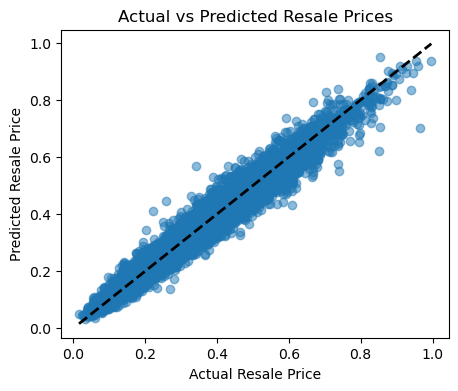

In [29]:
plt.figure(figsize=(5, 4))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Resale Price')
plt.ylabel('Predicted Resale Price')
plt.title('Actual vs Predicted Resale Prices')
plt.show()

## SVM

In [ ]:
from sklearn import svm
#regr = svm.SVR()
#regr.fit(X_train, y_train)
# Define the preprocessor

# Create a pipeline with the preprocessor and the SVR model
model_svm = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', svm.SVR())
])

# Fit the model
model_svm.fit(X_train, y_train)

y_pred_svm = model_svm.predict(X_test)

# Evaluation Metrics
mae_svm = mean_absolute_error(y_test, y_pred_svm)
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print(f"Mean Absolute Error: {mae_svm}")
print(f"Mean Squared Error: {mse_svm}")
print(f"R² Score: {r2_svm}")
plt.figure(figsize=(5, 4))
plt.scatter(y_test, y_pred_svm, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Resale Price')
plt.ylabel('Predicted Resale Price')
plt.title('Actual vs Predicted Resale Prices')
plt.show()

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['flat_type', 'storey_range',
                                                   'floor_area_sqm',
                                                   'remaining_lease', 'lat',
                                                   'lon',
                                                   'nearest_mrt_distance',
                                                   'nearest_bus_distance',
                                                   'education_score',
                                                   'shopping_score',
                                                   'food_score',
                                                   'recreation_score',
                                                   'healthcare_score',
                                                   'CPI (base 2024-12)',
                                                   'inflation_rate (x100)',
                                                   'building_age_2025',
                                                   'total_unemployment_rate',
                                                   'resident_unemployment_rate',
                                                   'interest_rate', 'fx_rate',
                                                   'avg_household_income',
                                                   'priv_prop', 'year',
                                                   'month_num', 'NoReligion',
                                                   'Buddhism', 'Taoism1',
                                                   'Islam', 'Hinduism',
                                                   'Sikhism', ...]),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['town', 'flat_model'])])),
                ('regressor', SVR())])

## Decision Tree

Mean Absolute Error: 0.020650847928952446
Mean Squared Error: 0.0008718554936352293
R² Score: 0.9472548711992491


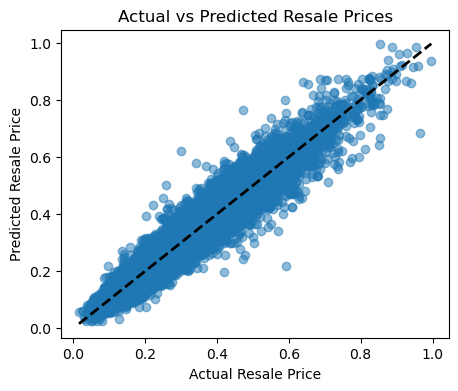

In [31]:
from sklearn import tree

model_dtree = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', tree.DecisionTreeRegressor())
])


model_dtree.fit(X_train, y_train)

y_pred_dtree = model_dtree.predict(X_test)

# Evaluation Metrics
mae_dtree = mean_absolute_error(y_test, y_pred_dtree)
mse_dtree = mean_squared_error(y_test, y_pred_dtree)
r2_dtree = r2_score(y_test, y_pred_dtree)

print(f"Mean Absolute Error: {mae_dtree}")
print(f"Mean Squared Error: {mse_dtree}")
print(f"R² Score: {r2_dtree}")
plt.figure(figsize=(5, 4))
plt.scatter(y_test, y_pred_dtree, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Resale Price')
plt.ylabel('Predicted Resale Price')
plt.title('Actual vs Predicted Resale Prices')
plt.show()



## SGD Regressor

Mean Absolute Error: 0.03149672559808869
Mean Squared Error: 0.0017256514560980572
R² Score: 0.895602299943554


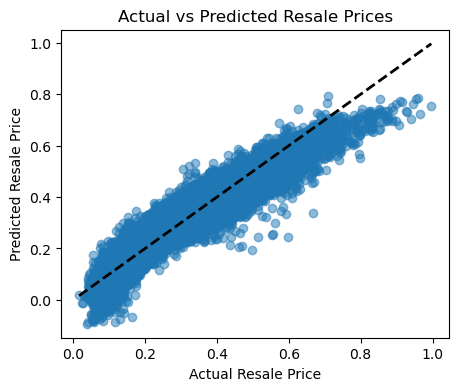

In [32]:
from sklearn.linear_model import SGDRegressor

model_sgd = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SGDRegressor())
])


model_sgd.fit(X_train, y_train)

y_pred_sgd = model_sgd.predict(X_test)

# Evaluation Metrics
mae_sgd = mean_absolute_error(y_test, y_pred_sgd)
mse_sgd = mean_squared_error(y_test, y_pred_sgd)
r2_sgd = r2_score(y_test, y_pred_sgd)

print(f"Mean Absolute Error: {mae_sgd}")
print(f"Mean Squared Error: {mse_sgd}")
print(f"R² Score: {r2_sgd}")
plt.figure(figsize=(5, 4))
plt.scatter(y_test, y_pred_sgd, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Resale Price')
plt.ylabel('Predicted Resale Price')
plt.title('Actual vs Predicted Resale Prices')
plt.show()



## PLS Regression

Mean Absolute Error: 0.043710401205857854
Mean Squared Error: 0.003254910271208883
R² Score: 0.8030858751901975


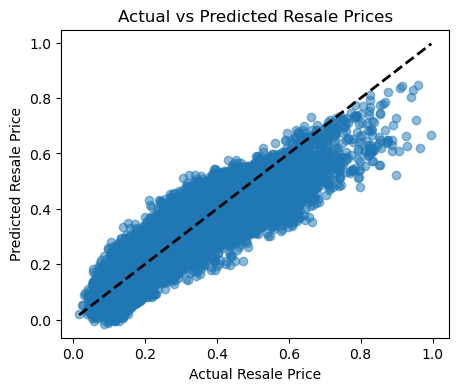

In [33]:
from sklearn.cross_decomposition import PLSRegression


model_PLSR = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', PLSRegression(n_components=2))
])


model_PLSR.fit(X_train, y_train)

y_pred_PLSR = model_PLSR.predict(X_test)

# Evaluation Metrics
mae_PLSR = mean_absolute_error(y_test, y_pred_PLSR)
mse_PLSR = mean_squared_error(y_test, y_pred_PLSR)
r2_PLSR = r2_score(y_test, y_pred_PLSR)

print(f"Mean Absolute Error: {mae_PLSR}")
print(f"Mean Squared Error: {mse_PLSR}")
print(f"R² Score: {r2_PLSR}")
plt.figure(figsize=(5, 4))
plt.scatter(y_test, y_pred_PLSR, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Resale Price')
plt.ylabel('Predicted Resale Price')
plt.title('Actual vs Predicted Resale Prices')
plt.show()

## AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression

model_adb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', AdaBoostRegressor(random_state=0, n_estimators=100))
])


model_adb.fit(X_train, y_train)

y_pred_adb = model_PLSR.predict(X_test)

# Evaluation Metrics
mae_adb = mean_absolute_error(y_test, y_pred_adb)
mse_adb = mean_squared_error(y_test, y_pred_adb)
r2_adb = r2_score(y_test, y_pred_adb)

print(f"Mean Absolute Error: {mae_adb}")
print(f"Mean Squared Error: {mse_adb}")
print(f"R² Score: {r2_adb}")
plt.figure(figsize=(5, 4))
plt.scatter(y_test, y_pred_adb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Resale Price')
plt.ylabel('Predicted Resale Price')
plt.title('Actual vs Predicted Resale Prices')
plt.show()


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['flat_type', 'storey_range',
                                                   'floor_area_sqm',
                                                   'remaining_lease', 'lat',
                                                   'lon',
                                                   'nearest_mrt_distance',
                                                   'nearest_bus_distance',
                                                   'education_score',
                                                   'shopping_score',
                                                   'food_score',
                                                   'recreation_score',
                                                   'healthcare_score',
                                                   'CPI (base 2024-12)',
                                                   'inflation_rate (x100)',
                                                   'building_age_2025',
                                                   'total_unemployment_rate',
                                                   'resident_unemployment_rate',
                                                   'interest_rate', 'fx_rate',
                                                   'avg_household_income',
                                                   'priv_prop', 'year',
                                                   'month_num', 'NoReligion',
                                                   'Buddhism', 'Taoism1',
                                                   'Islam', 'Hinduism',
                                                   'Sikhism', ...]),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['town', 'flat_model'])])),
                ('regressor',
                 AdaBoostRegressor(n_estimators=100, random_state=0))])

## Bagging Boost

In [37]:
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
model_bb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', BaggingRegressor(estimator=SVR(),n_estimators=10, random_state=0))
])

model_bb.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['flat_type', 'storey_range',
                                                   'floor_area_sqm',
                                                   'remaining_lease', 'lat',
                                                   'lon',
                                                   'nearest_mrt_distance',
                                                   'nearest_bus_distance',
                                                   'education_score',
                                                   'shopping_score',
                                                   'food_score',
                                                   'recreation_score',
                                                   'healthcare_score',
                                                   'CPI (base 2024-12)',
                                                   'inflation_rate (x100)',
                                                   'building_age_2025',
                                                   'total_unemployment_rate',
                                                   'resident_unemployment_rate',
                                                   'interest_rate', 'fx_rate',
                                                   'avg_household_income',
                                                   'priv_prop', 'year',
                                                   'month_num', 'NoReligion',
                                                   'Buddhism', 'Taoism1',
                                                   'Islam', 'Hinduism',
                                                   'Sikhism', ...]),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['town', 'flat_model'])])),
                ('regressor',
                 BaggingRegressor(estimator=SVR(), random_state=0))])

Mean Absolute Error: 0.043710401205857854
Mean Squared Error: 0.003254910271208883
R² Score: 0.8030858751901975


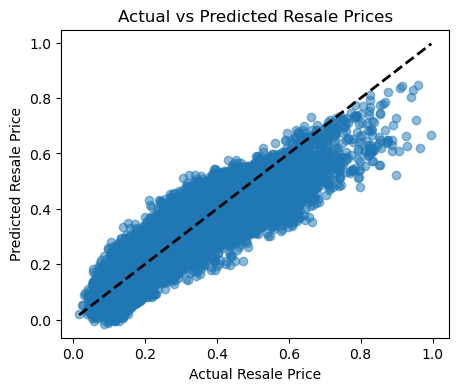

In [38]:
y_pred_bb = model_PLSR.predict(X_test)

# Evaluation Metrics
mae_bb = mean_absolute_error(y_test, y_pred_bb)
mse_bb = mean_squared_error(y_test, y_pred_bb)
r2_bb = r2_score(y_test, y_pred_bb)

print(f"Mean Absolute Error: {mae_bb}")
print(f"Mean Squared Error: {mse_bb}")
print(f"R² Score: {r2_bb}")
plt.figure(figsize=(5, 4))
plt.scatter(y_test, y_pred_bb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Resale Price')
plt.ylabel('Predicted Resale Price')
plt.title('Actual vs Predicted Resale Prices')
plt.show()
